### Testing the floating ceramic tube 20 mm downstream from the PFS

**Notes:**

Base pressure is 2.8e-6 mBar.

Since the ceramic tube made things worse, we have replaced that with a 4.5" CF flanged straight section to act as a metal tube. It's ~ 200 mm long and mounted 16 mm from the PFS.

**Conclusion:**

TBD.

<img src="images/PXL_20201130_113607609.jpg" width="500">

### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [1]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [42]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [28]:
data = apl.arrayPlateMeasurement()
data.connect()

KEITHLEY INSTRUMENTS INC.,MODEL 2701,4368285,D05  /A02  


### Run the following cell just to get a quick reading

In [29]:
currents = data.readCurrents(centre5x5 = False)
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

In [41]:
currents = data.readCurrents(centre5x5=False)
# apl.plotI(currents)
data.append(
    pressure = 5e-4,
    Vbias = 125,
    Ibias = 457,
    Varc = 70.3,
    Iarc = 5.10,
    Vpfs_tube = 42,
    Ibase = 126.6,
    currents = currents,
    note = 'Tube now floating. Bed current takes ages to equilibriate.'
)
data.plotI()

Number of entries: 12


In [44]:
data.save('data')

In [43]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [46]:
savedData = apl.arrayPlateMeasurement()
savedData.load("data_201130_163424.json")

12 entries loaded.


,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
0,201130_155937,125,12.7,69.3,1.36,NaN,0.45,1.032,0.0002,Tube connected to PFS via ammeter. PFS connect...


Tube connected to PFS via ammeter. PFS connected to positive terminal. Ipfs_tube in Amps!


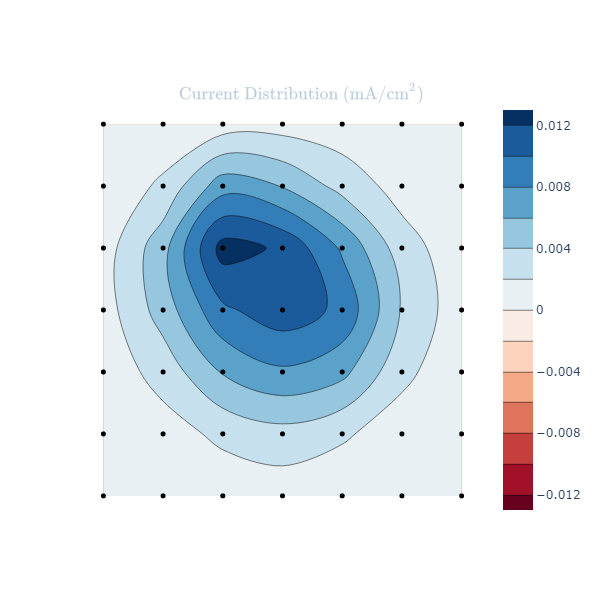

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
1,201130_160140,125,21.5,69.3,2.04,NaN,0.68,1.592,0.0002,Tube connected to PFS via ammeter. PFS connect...


Tube connected to PFS via ammeter. PFS connected to positive terminal. Ipfs_tube in Amps!


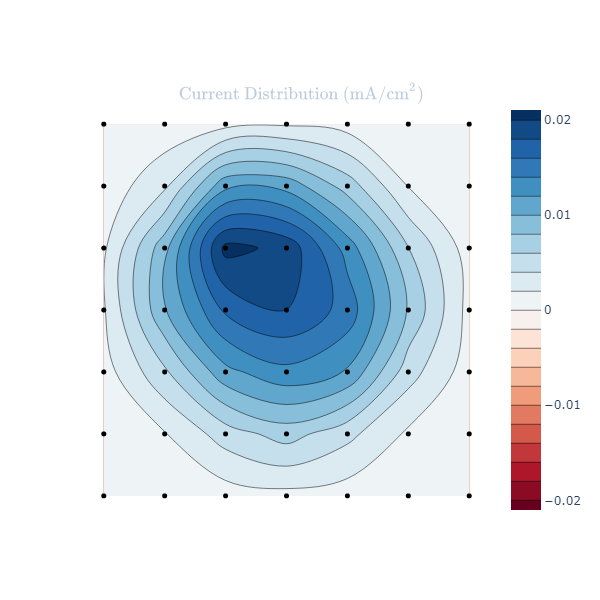

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
2,201130_160245,125,31.5,69.3,2.98,NaN,0.96,2.156,0.0002,Tube connected to PFS via ammeter. PFS connect...


Tube connected to PFS via ammeter. PFS connected to positive terminal. Ipfs_tube in Amps!


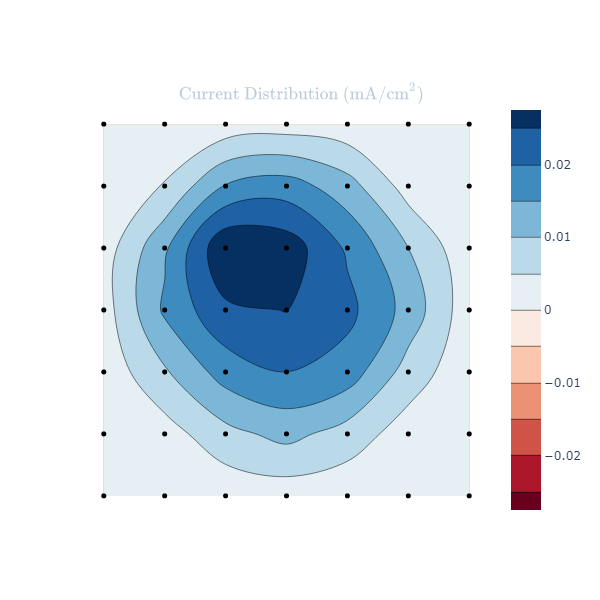

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
3,201130_160410,125,43.6,69.3,4.26,NaN,1.45,2.916,0.0002,Tube connected to PFS via ammeter. PFS connect...


Tube connected to PFS via ammeter. PFS connected to positive terminal. Ipfs_tube in Amps!


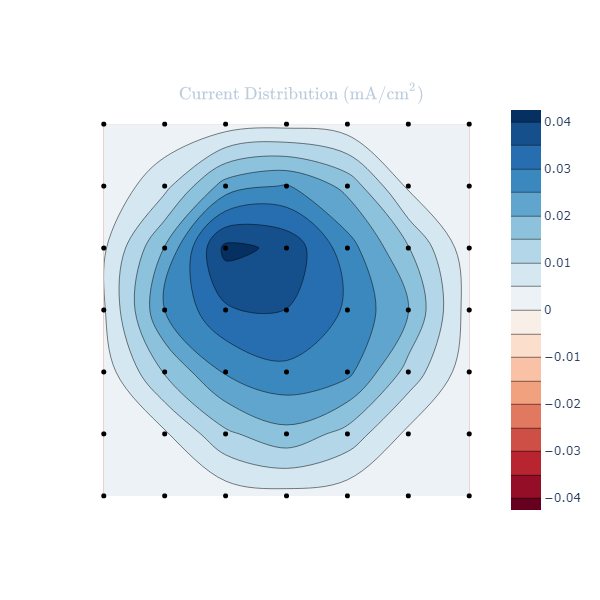

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
4,201130_160627,125,52.2,70.0,5.12,NaN,1.65,3.21,0.0002,Tube connected to PFS via ammeter. PFS connect...


Tube connected to PFS via ammeter. PFS connected to positive terminal. Ipfs_tube in Amps!


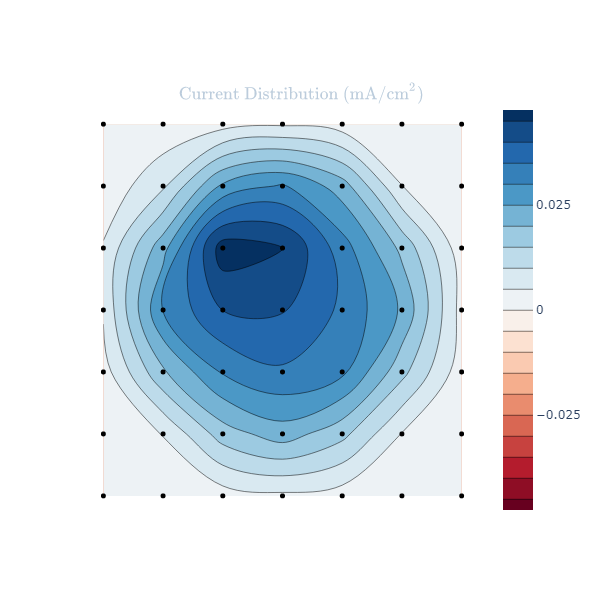

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
5,201130_161307,125,15.6,70.8,0.53,56.0,NaN,1.11,0.0002,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


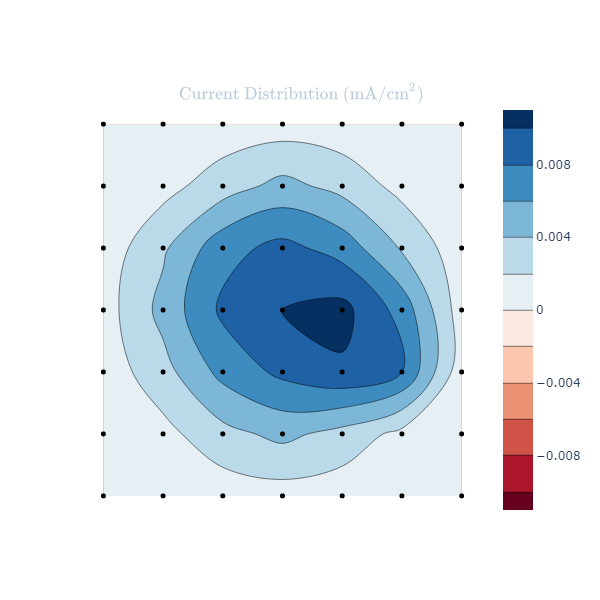

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
6,201130_161443,125,44.5,70.8,1.04,54.0,NaN,3.0,0.0002,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


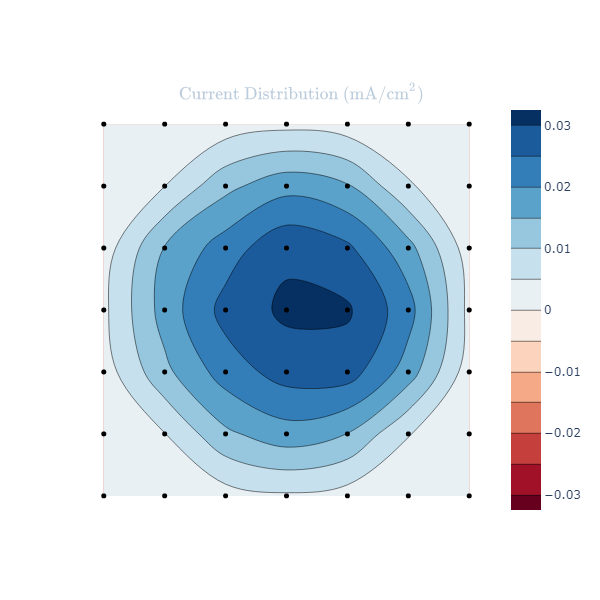

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
7,201130_161625,125,106.5,70.8,2.24,52.0,NaN,6.75,0.0002,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


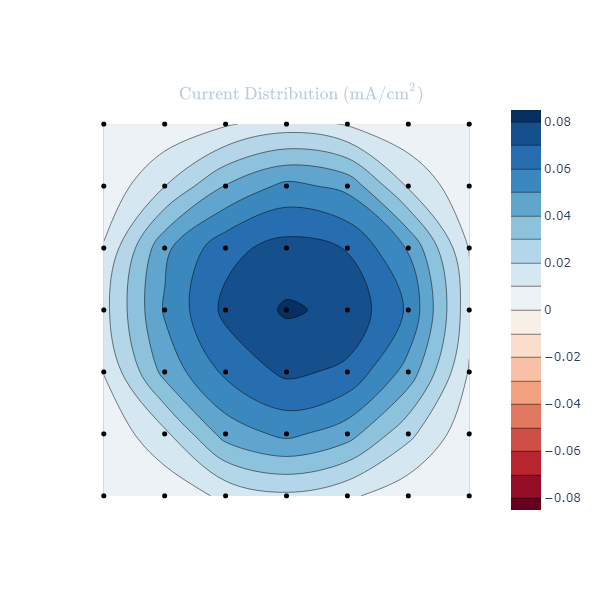

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
8,201130_161806,125,125.5,70.8,2.93,52.0,NaN,7.56,0.0002,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


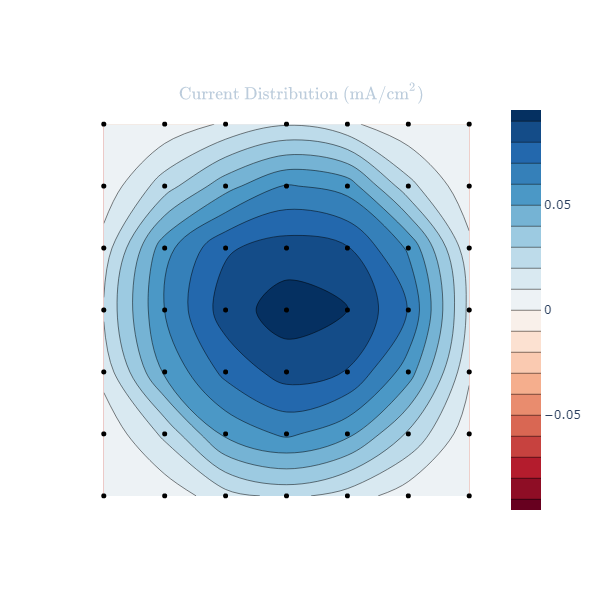

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
9,201130_162041,125,225.0,70.6,4.14,51.0,NaN,12.0,0.0002,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


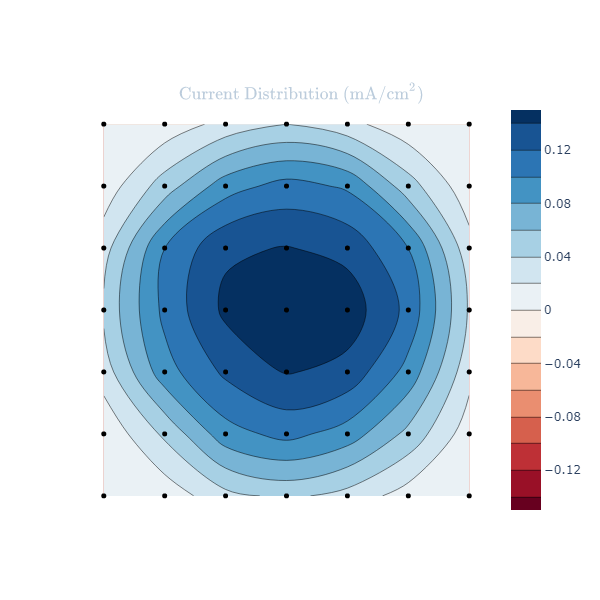

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
10,201130_162412,125,295.0,70.6,5.25,51.0,NaN,14.33,0.0002,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


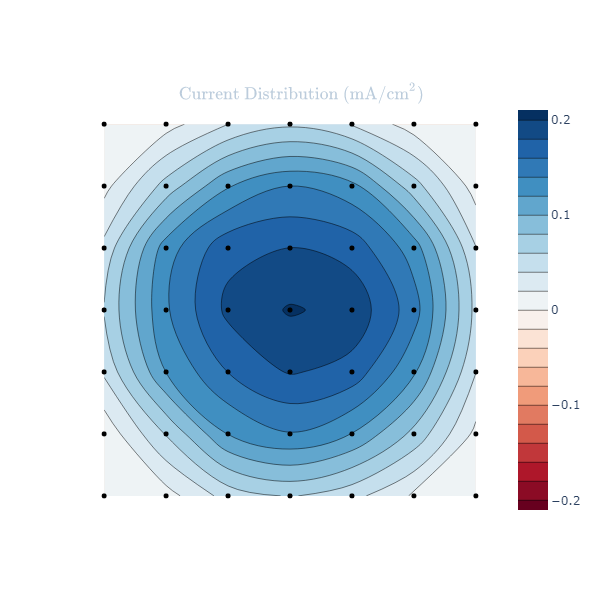

,time,Vbias,Ibias,Varc,Iarc,Vpfs_tube,Ipfs_tube,Ibase,pressure,note
11,201130_163144,125,457.0,70.3,5.1,42.0,NaN,126.6,0.0005,Tube now floating. Bed current takes ages to e...


Tube now floating. Bed current takes ages to equilibriate.


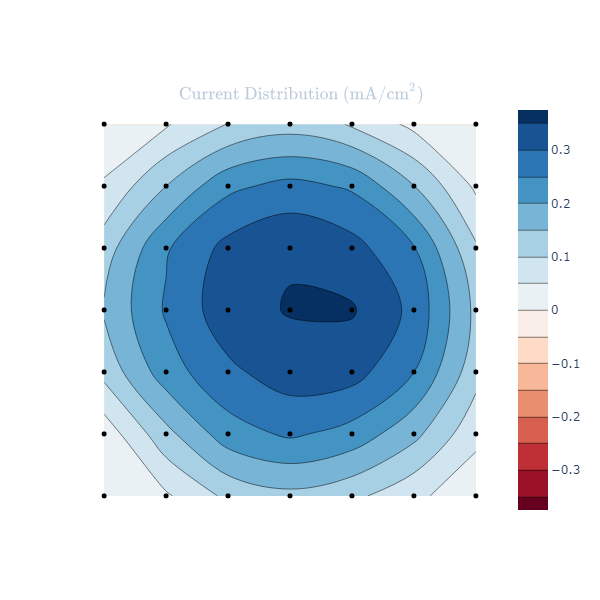

In [105]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(savedData.data)
# df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Ve1', 'Ie1', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]
df = df[['time', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Vpfs_tube', 'Ipfs_tube','Ibase', 'pressure', 'note']]

for i in range(savedData.len()):
    display(df[i:i+1])
    print(df[i:i+1]['note'].values[0])
    fig = savedData.plotI(i)
#     fig = plotI(data.data[i]['currents'])
    display(Image(pio.to_image(fig, format='png'))) # use this to have static graphs render on github.
#     fig.show()

##### Plot of $I_{base}$ and $I_{PinMax}$ vs Run

In [54]:
x = []
Ibase = []
IpinMax = []
for i, run in enumerate(savedData.data):
    x.append(i)
    Ibase.append(run['Ibias'])
    currents = np.array(run['currents'])
    IpinMax.append(np.max(currents)) 
    print(i, Ibase[i], IpinMax[i])

0 12.7 0.01284
1 21.5 0.02064
2 31.5 0.02951
3 43.6 0.0415
4 52.2 0.04781
5 15.6 0.01064
6 44.5 0.03101
7 106.5 0.08127
8 125.5 0.0949
9 225 0.1596
10 295 0.202
11 457 0.355


In [98]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
# fig = make_subplots(specs=[[{"secondary_y": True}]],layout = layout)

layout = go.Layout(
    xaxis =  {'showgrid': False},
    yaxis = {'showgrid': True},
#         title = '$I_{base}$ and $I_{PinMax}$ vs Run',
#         title_font_color="#BCCCDC",
#         height=600,
#         width=600,
    )
# fig = go.Figure(layout = layout)
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=x,y=Ibase, mode='markers', name = '$I_{base}$',),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=x,y=IpinMax, mode='markers', name = '$I_{pinMax}$'),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="$I_{base}\ and\ I_{PinMax}\ vs\ Run$",
#     xaxis =  {'showgrid': False},
#     yaxis = {'showgrid': True},
)

# Set x-axis title
fig.update_xaxes(title_text="Run Number")

# Set y-axes titles
fig.update_yaxes(title_text="$I_{base}\ (mA)$", secondary_y=False)
fig.update_yaxes(title_text="$I_{pinMax} \ (mA/cm^2)$", secondary_y=True)

fig.show()